In [1]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from structered_data import StructuredData
from confectionery import Confectionery
from cluster_half_shelfs_alpha import Half_shelf_cluster
from scipy.signal import savgol_filter
from matplotlib import cm


# Load and define necessary variables

In [2]:

obj_0=np.load('data/obj_0_traj.npy')
start_frame=round(obj_0[0,0])
end_frame=round(obj_0[-1,0])
stream_string=[]
for i in range(start_frame,end_frame+1):
    im_path="/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/Image_Data/Aufnahmen_JPEG_06_07_take_2/Hoang_07_06_2023_Aufnahmen_Rollen_Partikel_Rollen_12_mu_200_002_t"+str(i).zfill(3)+".jpg"
    stream_string.append(im_path)
koppenrath=Confectionery()
r_effective=11

In [3]:
structered_data=StructuredData(obj_0,stream_string,koppenrath)
data=structered_data.load_data("data/data_structured.npy")

# apply all relevant filters and save

In [4]:
spatial_filter_length=3
temporal_filter_length=5

time_data=data.reshape((data.shape[0],-1))
mean_filter_spatial=np.ones((spatial_filter_length,spatial_filter_length))/(spatial_filter_length*spatial_filter_length)
data_filtered_spatial=structered_data.spatial_filter_data(mean_filter_spatial,mode="nearest")
mean_filter_time=np.ones((temporal_filter_length))/temporal_filter_length
data_filtered_temporal=structered_data.temporal_filter_data(mean_filter_time,mode="nearest")
structered_data.overwrite_data(data_filtered_spatial)
data_filtered_both=structered_data.temporal_filter_data(mean_filter_time,mode="nearest")
structered_data.save_data(name="data_structured_spatial_temporal_filtered.npy",path="data/")

30.888887
-65.22222


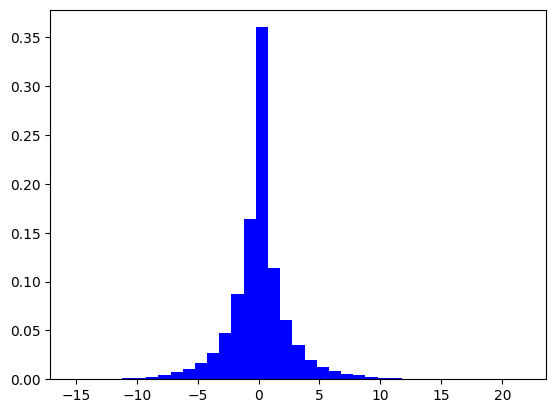

In [5]:
dev=savgol_filter(data_filtered_both.reshape((data_filtered_both.shape[0],-1)), window_length=temporal_filter_length, polyorder=4, deriv=1, axis=0)
dev=dev.reshape(data_filtered_both.shape)
dev=structered_data.overwrite_data(dev)

dev_flat=dev.reshape(-1)
print(np.max(dev_flat))
print(np.min(dev_flat))
plt.figure()
n, bins, patches = plt.hist(dev_flat, bins=np.arange(np.min(dev_flat)+50,np.max(dev_flat)+1-10), color = "blue", density=True)
plt.show()



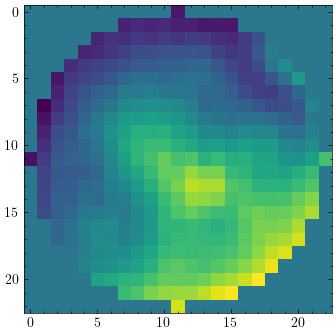

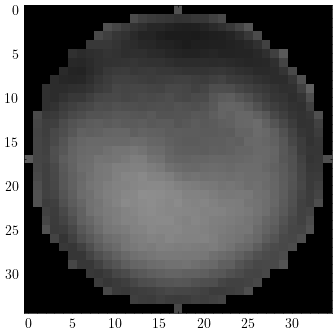

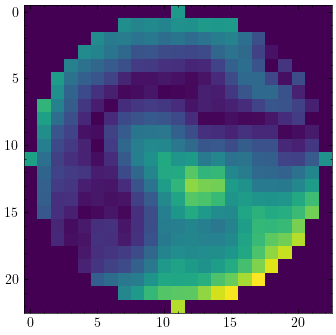

In [6]:

dev=structered_data.cut_data(r_effective)
A=np.abs(dev[20,:,:])
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [4, 4]
    plt.imshow(dev[20,:,:],cmap="viridis",vmin=np.min(dev[20,:,:]),vmax=np.max(dev[20,:,:]))
    plt.show()
    plt.imshow(data[20,:,:],cmap="gray",vmin=0,vmax=255)
    plt.show()
    plt.imshow(A,cmap="viridis",vmin=0,vmax=np.max(A))
    plt.show()

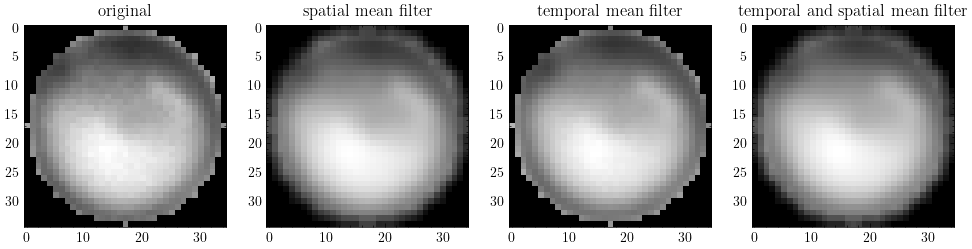

In [7]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 10]
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4)
    ax1.imshow(data[20,:,:],cmap="gray")
    ax1.set_title("original")
    ax2.imshow(data_filtered_spatial[20,:,:],cmap="gray")
    ax2.set_title("spatial mean filter")
    ax3.imshow(data_filtered_temporal[20,:,:],cmap="gray")
    ax3.set_title("temporal mean filter")
    ax4.imshow(data_filtered_both[20,:,:],cmap="gray")
    ax4.set_title("temporal and spatial mean filter")
    plt.show()


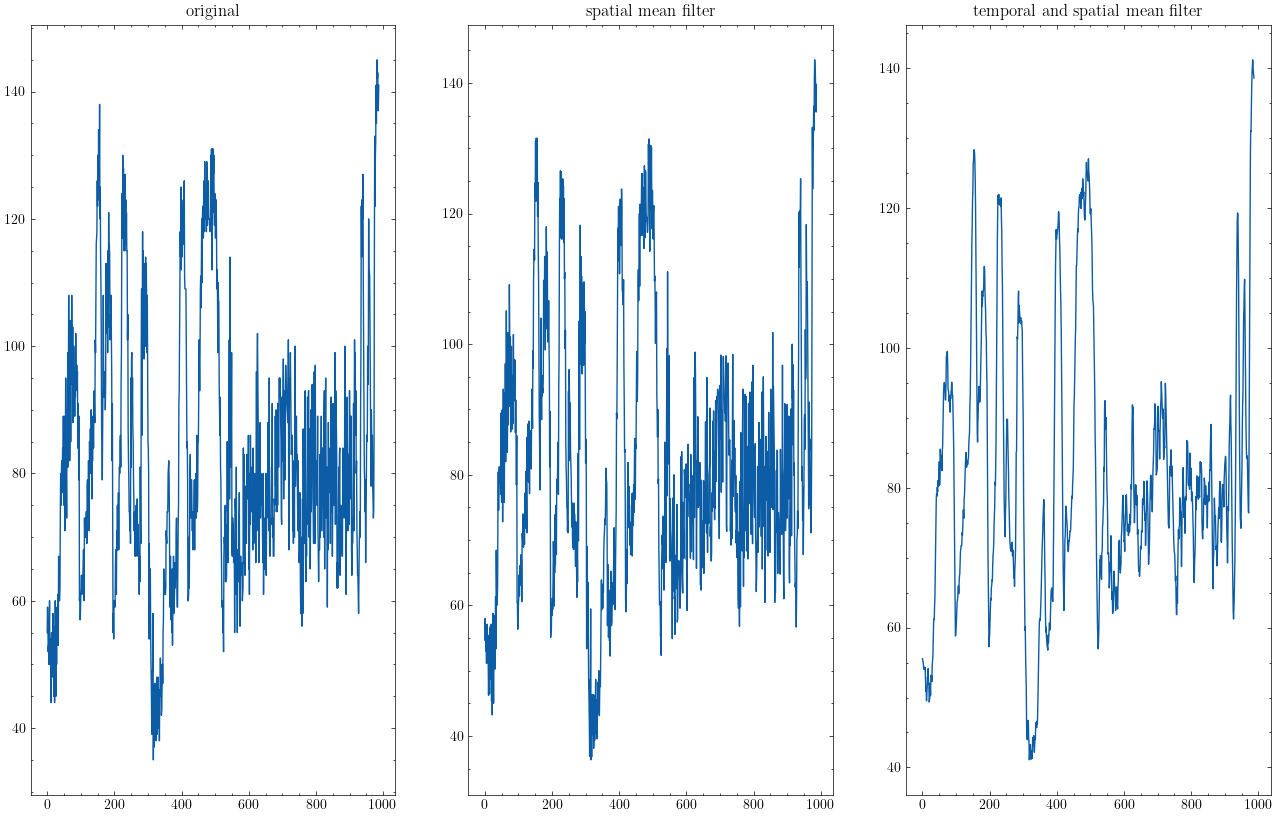

In [8]:
structered_data.overwrite_data(data_filtered_both)
data=structered_data.cut_data(r_effective)
X=data.reshape((data.shape[0],-1))
X=X[:,structered_data.time_indeces]

structered_data.overwrite_data(data_filtered_spatial)
data=structered_data.cut_data(r_effective)
Y=data.reshape((data.shape[0],-1))
Y=Y[:,structered_data.time_indeces]

structered_data.overwrite_data(structered_data.load_data("data/data_structured.npy"))
data=structered_data.cut_data(r_effective)
Z=data.reshape((data.shape[0],-1))
Z=Z[:,structered_data.time_indeces]


t=np.arange(X.shape[0])
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [16, 10]
    fig,(ax1,ax2,ax3)=plt.subplots(1,3)
    ax1.plot(t,Z[:,0])
    ax1.set_title("original")
    ax2.plot(t,Y[:,0])
    ax2.set_title("spatial mean filter")
    ax3.plot(t,X[:,0])
    ax3.set_title("temporal and spatial mean filter")
    plt.show()



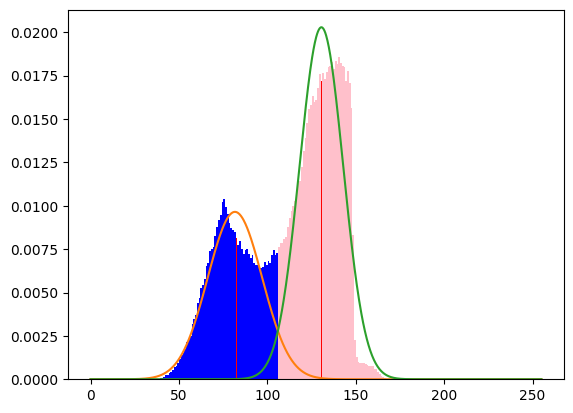

In [9]:
half_shelf_cluster=Half_shelf_cluster(obj_0, stream_string, confectionery=koppenrath,cut_radius=11)
half_shelf_cluster.load_data_from_np_array(X.reshape(-1))
half_shelf_cluster.train_gmm(number_of_gaussian=2,plot_hist=True)